### Uber Rides Data 2014

#### Source: <https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city>

In [1]:
# Imprting essential libraries
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Path to CSV files
path = 'D:/Programming/Python/Jupyter Notebook Files/Data Engineering/'
os.chdir(path)

# Specify the data file and the number of files to read
data_file = 'uber-raw-data'
number_of_files = 6

In [3]:
# Reading the CSV files and concatenating them into one dataframe
def loop(file_number):
    return pd.read_csv(path + data_file + f"-{file_number}.csv")
raw_df = Parallel(n_jobs=-1, verbose=10)(delayed(loop)(file_number) for file_number in range(1,number_of_files + 1))
raw_df = pd.concat(raw_df, ignore_index= True)
raw_df.head()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    2.9s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    3.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.1s finished


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
# Checking the data size
raw_df.shape

(4534327, 4)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [6]:
# Creating copy of Original df
df = raw_df.copy(deep=True)

In [7]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

The Base codes are for the following Uber bases:

B02512 : Unter 

B02598 : Hinter

B02617 : Weiter

B02682 : Schmecken

B02764 : Danach-NY

B02765 : Grun

B02835 : Dreist

B02836 : Drinnen

In [8]:
# Renaming Base code to values for interpretation
base_Values = {'B02512' : 'Unter',
                'B02598' : 'Hinter',
                'B02617' : 'Weiter',
                'B02682' : 'Schmecken',
                'B02764' : 'Danach-NY',
                'B02765' : 'Grun',
                'B02835' : 'Dreist',
                'B02836' : 'Drinnen'}

df  = df.replace({'Base' : base_Values})
df.head()


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,Unter
1,4/1/2014 0:17:00,40.7267,-74.0345,Unter
2,4/1/2014 0:21:00,40.7316,-73.9873,Unter
3,4/1/2014 0:28:00,40.7588,-73.9776,Unter
4,4/1/2014 0:33:00,40.7594,-73.9722,Unter


<AxesSubplot:xlabel='Lat', ylabel='Lon'>

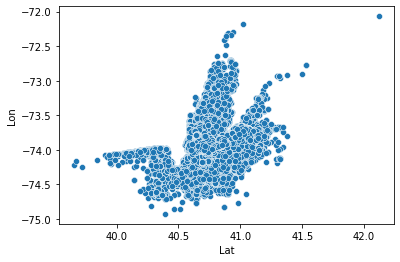

In [9]:
sns.scatterplot(x='Lat',y='Lon', data = df)

In [10]:
df['Base'].value_counts()

Weiter       1458853
Hinter       1393113
Schmecken    1212789
Danach-NY     263899
Unter         205673
Name: Base, dtype: int64

In [11]:
# Checking for missing values
df['Base'].isna().sum()

0

In [12]:
df['Date/Time']= pd.to_datetime(df['Date/Time'])
df['Date/Time'] = df['Date/Time'].dt.strftime('%m/%d/%Y')

In [13]:
df_dummies = pd.get_dummies(df['Base'])
df = pd.concat([df, df_dummies], axis=1)

In [14]:
df.head()

,Date/Time,Lat,Lon,Base,Danach-NY,Hinter,Schmecken,Unter,Weiter
0,04/01/2014,40.7690,-73.9549,Unter,0,0,0,1,0
1,04/01/2014,40.7267,-74.0345,Unter,0,0,0,1,0
2,04/01/2014,40.7316,-73.9873,Unter,0,0,0,1,0
3,04/01/2014,40.7588,-73.9776,Unter,0,0,0,1,0
4,04/01/2014,40.7594,-73.9722,Unter,0,0,0,1,0


### Plotting Graphs

<AxesSubplot:xlabel='Date/Time', ylabel='Unter'>

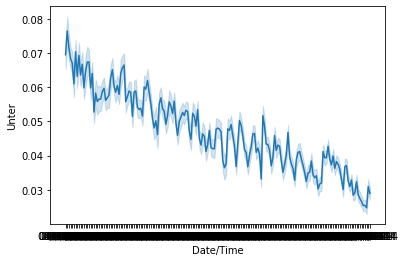

In [15]:
sns.lineplot(x = 'Date/Time', y = 'Unter', data = df)

<AxesSubplot:xlabel='Date/Time', ylabel='Weiter'>

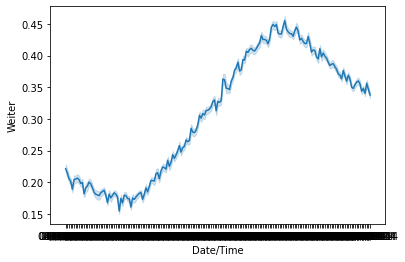

In [16]:
sns.lineplot(x = 'Date/Time', y = 'Weiter', data = df)

### End